# Synthetic Data

> Defines methods for generating synthetic data with varying levels of realism.

In [ ]:
#| default_exp synthetic_data

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| hide
from nbdev.showdoc import *
from fastcore.basics import *

In [ ]:
#| export
import matplotlib.pyplot as plt
import numpy as np
from circadian.lights import LightSchedule

In [ ]:
#| export
#| hide
def generate_activity_from_light(
    time: np.ndarray, # time points.
    light: LightSchedule, # light schedule.
    mu_l: float=5.0, # mean of low activity levels.
    mu_h: float=25.0, # mean of high activity levels.
    mu_s: float=0.0, # mean of sleep activity levels.
    sigma_l: float=7.5, # std of low activity levels.
    sigma_h: float=30.0, # std of high activity levels.
    sigma_s: float=2.0, # std of activity during sleep.
    active_level: float=0.5, # person's activity level from 0 to 1. Represents the probability of choosing from the high or low activity distributions at any point in time. Values close to 1 increase the proportion of high activity values.
) -> np.ndarray:
    "Generates an 'activity' schedule from an input light schedule. The activity schedule produced is a corrupted version of the light schedule."
    # input validation
    if not isinstance(mu_l, (float, int)):
        raise TypeError(f"mu_l must be a float or int, got {type(mu_l)}")
    elif mu_l < 0.0:
        raise ValueError(f"mu_l must be a nonnegative float or int, got {mu_l}")
    if not isinstance(mu_h, (float, int)):
        raise TypeError(f"mu_h must be a float or int, got {type(mu_h)}")
    elif mu_h < 0.0:
        raise ValueError(f"mu_h must be a nonnegative float or int, got {mu_h}")
    if not isinstance(mu_s, (float, int)):
        raise TypeError(f"mu_s must be a float or int, got {type(mu_s)}")
    elif mu_s < 0.0:
        raise ValueError(f"mu_s must be a nonnegative float or int, got {mu_s}")
    if not isinstance(sigma_l, (float, int)):
        raise TypeError(f"sigma_l must be a float or int, got {type(sigma_l)}")
    elif sigma_l < 0.0:
        raise ValueError(f"sigma_l must be a nonnegative float or int, got {sigma_l}")
    if not isinstance(sigma_h, (float, int)):
        raise TypeError(f"sigma_h must be a float or int, got {type(sigma_h)}")
    elif sigma_h < 0.0:
        raise ValueError(f"sigma_h must be a nonnegative float or int, got {sigma_h}")
    if not isinstance(sigma_s, (float, int)):
        raise TypeError(f"sigma_s must be a float or int, got {type(sigma_s)}")
    elif sigma_s < 0.0:
        raise ValueError(f"sigma_s must be a nonnegative float or int, got {sigma_s}")
    if not isinstance(active_level, (float, int)):
        raise TypeError(f"active_level must be a float or int, got {type(active_level)}")
    elif active_level < 0.0 or active_level > 1.0:
        raise ValueError(f"active_level must be between 0.0 and 1.0, got {active_level}")
    # check that time is a Numpy array
    if not isinstance(time, np.ndarray):
        raise TypeError("`time` must be a Numpy array")
    # check that the light schedule is a LightSchedule
    if not isinstance(light, LightSchedule):
        raise TypeError("`light` must be a `LightSchedule` object")

    # create the activity vector the same size as time
    activity = np.zeros(time.shape)
    for t in range(time.shape[0]):
        if light(time[t]) == 0:
            activity[t] = np.abs(np.random.normal(mu_s, sigma_s))
        elif light(time[t]) > 0:
            high_activity = np.random.uniform() <= active_level
            if high_activity == True:
                activity[t] = np.abs(np.random.normal(mu_h, sigma_h))
            elif high_activity == False:
                activity[t] = np.abs(np.random.normal(mu_l, sigma_l))
    return activity


## Generating Activity from Light Schedules

This function generates an 'activity' schedule from an input LightSchedule.

It essentially corrupts the light pulse train based on three normal distributions. When the light pulse is on, the function draws from a high or low activity distribution based on a parameter representing how active the person is, and when it is off, the function draws from a sleep activity distribution.

There are 7 parameters for the method:
* mu_l - mean low activity level
* mu_h - mean high activity level
* mu_s - mean sleep activity level
* sigma_l - std of high activity level
* sigma_h - std of high activity level
* sigma_s - std of sleep activity - how active the person is in their sleep
* active_level - [0, 1] value representing how active the person is. When close to 1, they have a higher probability of being in the high activity distribution at any point in time

## Examples

This section uses the Circadian package to generate the 4 light schedules:
* Regular
* Shift Work
* Slam Shift
* Social Jetlag

then passes each to the function to generate 'activity' schedules from them.

In [ ]:
# Activity levels.
mu_l = 5    # Mean of low activity levels.
mu_h = 25   # Mean of high activity levels.
mu_s = 0    # Mean of sleep activity levels.

# Activity uncertainty.
sigma_l = 7.5   # Std of low activity levels.
sigma_h = 30    # Std of high activity levels.
sigma_s = 2     # Std of activity during sleep.
sigma_t = 1.5   # Std of sleep onset/offset timing.

# The person's activity level from 0 to 1.
active_level = 0.5

# Number of days and samples of interest.
num_days = 12
num_samples = 60*24*num_days

In [ ]:
# Create the time, light and activity signals.

# Time vector.
time = np.arange(0, 24*num_days, 1/60)

# Light schedules.
regular_light = LightSchedule.Regular()
shift_light = LightSchedule.ShiftWork()
slam_light = LightSchedule.SlamShift()
social_jetlag = LightSchedule.SocialJetlag()

# Create the activity signals.
regular_activity = generate_activity_from_light(
    time, regular_light,
    mu_l, mu_h, mu_s, sigma_l, sigma_h, sigma_s,
    active_level, 
)
shift_activity = generate_activity_from_light(
    time, shift_light,
    mu_l, mu_h, mu_s, sigma_l, sigma_h, sigma_s,
    active_level,
)
slam_activity = generate_activity_from_light(
    time, slam_light,
    mu_l, mu_h, mu_s, sigma_l, sigma_h, sigma_s,
    active_level,
)
social_jetlag_activity = generate_activity_from_light(
    time, social_jetlag,
    mu_l, mu_h, mu_s, sigma_l, sigma_h, sigma_s,
    active_level
)

## Visualization

Here, we visualize the 'activity' schedules with their corresponding input light schedules.

In [ ]:
nrows, ncols = 2, 1

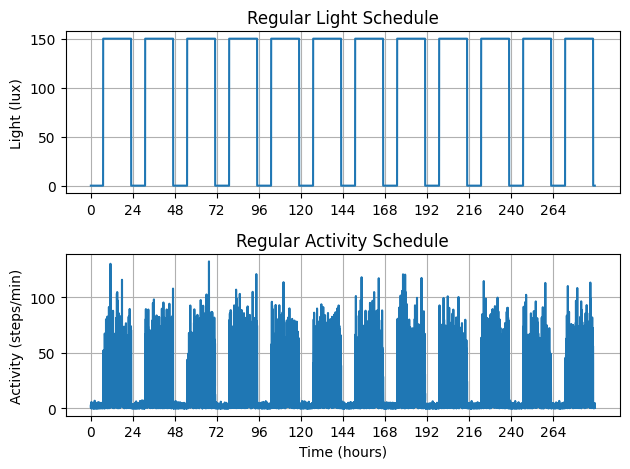

In [ ]:
# Regular plots.
fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
regular_light.plot(
    plot_start_time=0.0,
    plot_end_time=24*num_days,
    num_samples=num_samples,
    ax=ax[0]
)
ax[0].set_ylabel("Light (lux)")
ax[0].set_title("Regular Light Schedule")
ax[0].set_xticks(np.arange(min(time), max(time), 24))
ax[0].grid()
ax[1].plot(
    time, regular_activity
)
ax[1].set_ylabel("Activity (steps/min)")
ax[1].set_xlabel("Time (hours)")
ax[1].set_title("Regular Activity Schedule")
ax[1].set_xticks(np.arange(min(time), max(time), 24))
ax[1].grid()

plt.tight_layout()

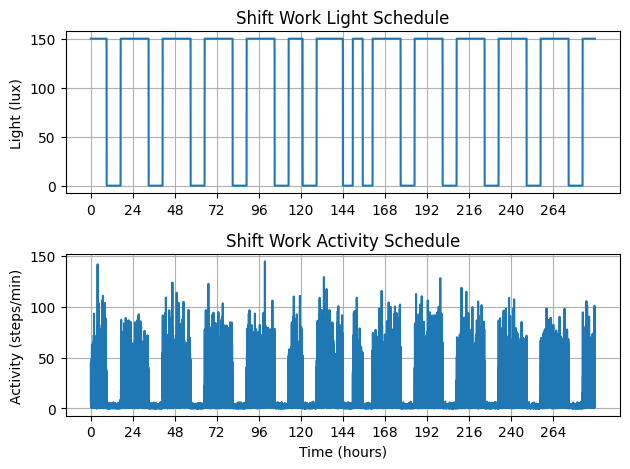

In [ ]:
# Shift Work plots.
fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
shift_light.plot(
    plot_start_time=0.0,
    plot_end_time=24*num_days,
    num_samples=num_samples,
    ax=ax[0]
)
ax[0].set_ylabel("Light (lux)")
ax[0].set_title("Shift Work Light Schedule")
ax[0].set_xticks(np.arange(min(time), max(time), 24))
ax[0].grid()
ax[1].plot(
    time, shift_activity
)
ax[1].set_ylabel("Activity (steps/min)")
ax[1].set_xlabel("Time (hours)")
ax[1].set_title("Shift Work Activity Schedule")
ax[1].set_xticks(np.arange(min(time), max(time), 24))
ax[1].grid()

plt.tight_layout()

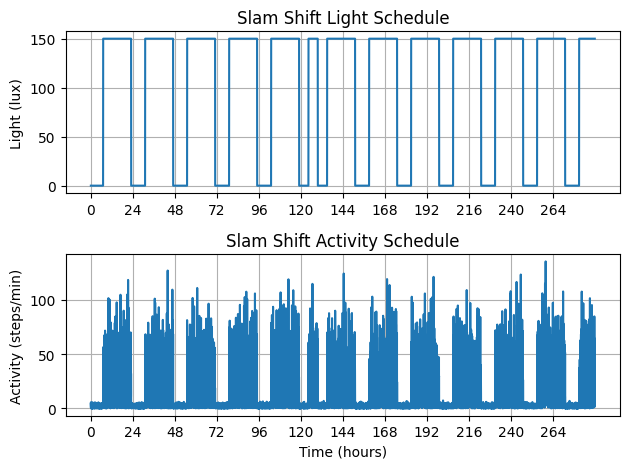

In [ ]:
# Slam Shift plots.
fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
slam_light.plot(
    plot_start_time=0.0,
    plot_end_time=24*num_days,
    num_samples=num_samples,
    ax=ax[0]
)
ax[0].set_ylabel("Light (lux)")
ax[0].set_title("Slam Shift Light Schedule")
ax[0].set_xticks(np.arange(min(time), max(time), 24))
ax[0].grid()
ax[1].plot(
    time, slam_activity
)
ax[1].set_ylabel("Activity (steps/min)")
ax[1].set_xlabel("Time (hours)")
ax[1].set_title("Slam Shift Activity Schedule")
ax[1].set_xticks(np.arange(min(time), max(time), 24))
ax[1].grid()

plt.tight_layout()

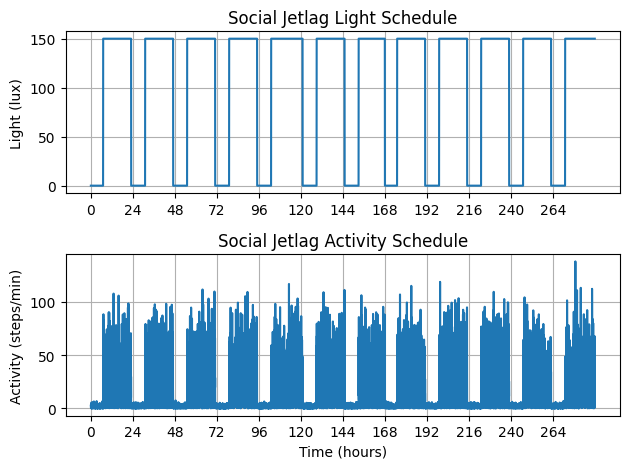

In [ ]:
# Social Jetlag plots.
fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
social_jetlag.plot(
    plot_start_time=0.0,
    plot_end_time=24*num_days,
    num_samples=num_samples,
    ax=ax[0]
)
ax[0].set_ylabel("Light (lux)")
ax[0].set_title("Social Jetlag Light Schedule")
ax[0].set_xticks(np.arange(min(time), max(time), 24))
ax[0].grid()
ax[1].plot(
    time, social_jetlag_activity
)
ax[1].set_ylabel("Activity (steps/min)")
ax[1].set_xlabel("Time (hours)")
ax[1].set_title("Social Jetlag Activity Schedule")
ax[1].set_xticks(np.arange(min(time), max(time), 24))
ax[1].grid()

plt.tight_layout()

# API Documentation

In [ ]:
show_doc(generate_activity_from_light)

---

[source](https://github.com/Arcascope/circadian/blob/main/circadian/synthetic_data.py#L12){target="_blank" style="float:right; font-size:smaller"}

### generate_activity_from_light

>      generate_activity_from_light (time:numpy.ndarray,
>                                    light:circadian.lights.LightSchedule,
>                                    mu_l:float=5.0, mu_h:float=25.0,
>                                    mu_s:float=0.0, sigma_l:float=7.5,
>                                    sigma_h:float=30.0, sigma_s:float=2.0,
>                                    active_level:float=0.5)

Generates an 'activity' schedule from an input light schedule. The activity schedule produced is a corrupted version of the light schedule.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| time | ndarray |  | time points. |
| light | LightSchedule |  | light schedule. |
| mu_l | float | 5.0 | mean of low activity levels. |
| mu_h | float | 25.0 | mean of high activity levels. |
| mu_s | float | 0.0 | mean of sleep activity levels. |
| sigma_l | float | 7.5 | std of low activity levels. |
| sigma_h | float | 30.0 | std of high activity levels. |
| sigma_s | float | 2.0 | std of activity during sleep. |
| active_level | float | 0.5 | person's activity level from 0 to 1. Represents the probability of choosing from the high or low activity distributions at any point in time. Values close to 1 increase the proportion of high activity values. |
| **Returns** | **ndarray** |  |  |

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()